In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iit-nit-data/data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("../input/iit-nit-data/data.csv")
df.head(3)

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

<AxesSubplot:title={'center':'Relationship between Opening rank and Closing rank'}, xlabel='opening_rank', ylabel='closing_rank'>

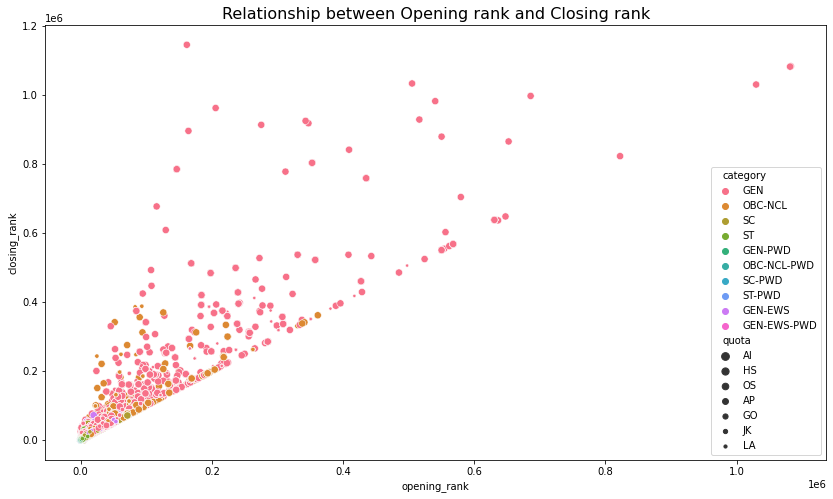

In [6]:
plt.figure(figsize=(14,8))
sp=sns.scatterplot(x="opening_rank",y="closing_rank",size="quota",sizes=(10,60),
                   data=df,hue="category",palette="husl")
sp.set_title("Relationship between Opening rank and Closing rank",
            fontdict={'fontsize':16})
sp

In [7]:
df["degree_short"].value_counts()

B.Tech                   52086
B.Tech + M.Tech (IDD)     6030
BSc                       2200
B.Arch                    1343
Btech + M.Tech (IDD)       868
BS + MS (IDD)              660
Int M.Tech                 594
Int Msc.                   523
Int MSc.                   298
BSc + MSc (IDD)            204
B.Plan                     144
B.Pharm                      4
B.Pharm + M.Pharm            4
Name: degree_short, dtype: int64

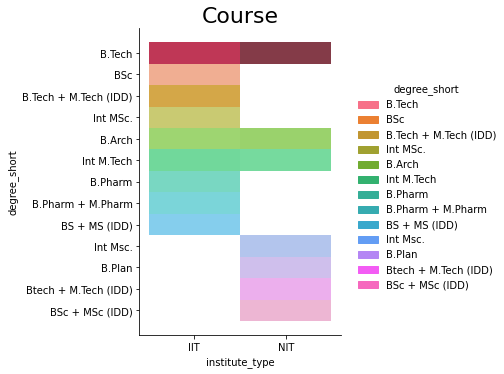

In [8]:

rj=sns.displot(x="institute_type",y="degree_short",
            data=df,hue="degree_short")

rj
plt.title("Course",fontdict={'fontsize':22})
plt.show()

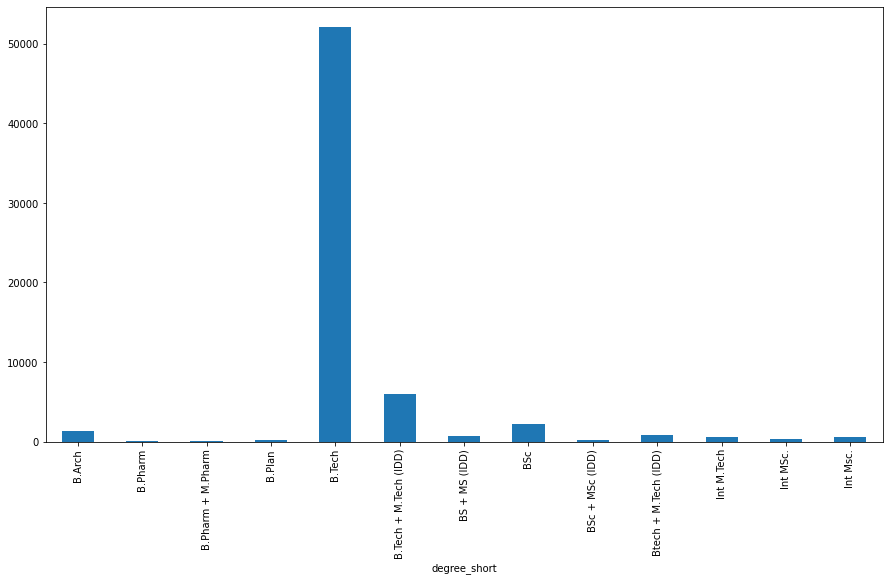

In [9]:
plt.figure(figsize=(15,8))
institutes = df.groupby(['degree_short']).size().plot (kind ='bar')
plt.show()

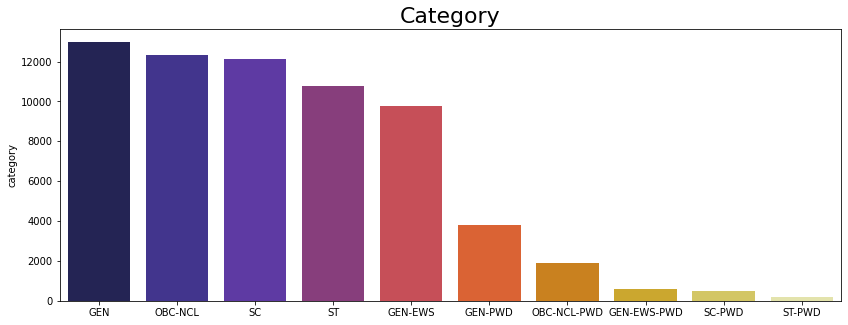

In [10]:
plt.figure(figsize=(14,5))
sns.barplot(x=['GEN','OBC-NCL','SC','ST','GEN-EWS','GEN-PWD','OBC-NCL-PWD','GEN-EWS-PWD',
               'SC-PWD','ST-PWD'],y=df['category'].value_counts(),palette="CMRmap")
plt.title("Category",fontdict={'fontsize':22})
plt.show()

<AxesSubplot:>

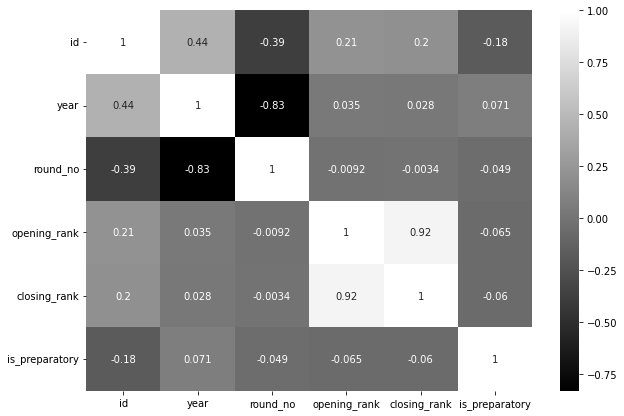

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap="gist_gray",annot=True)

In [12]:
sd=df["pool"].value_counts()
sd

Gender-Neutral    38785
Female-Only       26173
Name: pool, dtype: int64

<AxesSubplot:title={'center':'POOL'}, ylabel='pool'>

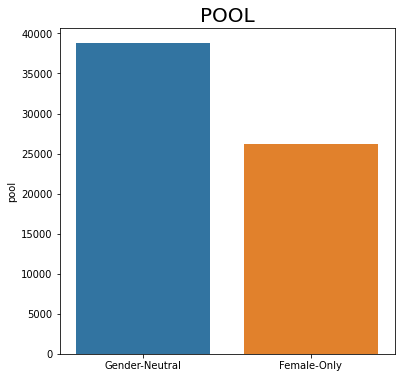

In [13]:
plt.figure(figsize=(6,6))
plt.title("POOL",fontdict={'fontsize':20})
sns.barplot(x=["Gender-Neutral","Female-Only"],y=sd,data=df)

In [14]:
df["year"].value_counts()

2021    47400
2020     6604
2019     6254
2018     1917
2016     1578
2017     1205
Name: year, dtype: int64

<AxesSubplot:title={'center':' Year-wise distribution'}, ylabel='year'>

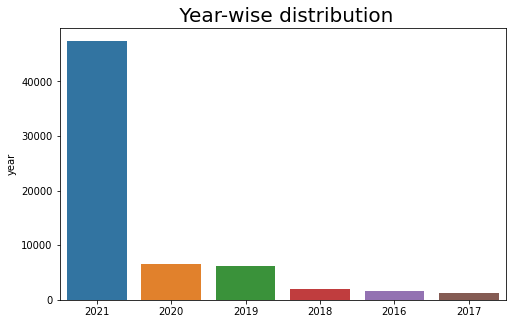

In [15]:
plt.figure(figsize=(8,5))
plt.title(" Year-wise distribution",fontdict={'fontsize':20})
sns.barplot(x=["2021","2020","2019","2018","2016","2017"],y=df["year"].value_counts(),data=df)